In [ ]:
import numpy as np
import mdptoolbox

# 示例数据
num_samples = 130
num_features = 9
num_actions = 45
num_targets = 50

# 生成随机数据作为示例
samples = []
for i in range(num_samples):
    features = np.random.random(num_features)
    targets = np.random.random(num_targets)
    samples.append({"features": features, "targets": targets})

# 构建状态空间和动作空间
state_space_size = num_features + num_targets
action_space_size = num_actions

: 

In [ ]:

# 构建MDP的奖励矩阵
R = np.zeros((action_space_size, state_space_size, state_space_size))

for a in range(action_space_size):
    for s in range(state_space_size):
        features = samples[s]["features"]
        targets = samples[s]["targets"]
        
        # 模拟动作对应的状态转移
        next_features = features  # 假设状态转移不变
        next_targets = targets + np.random.random(num_targets) * 0.1  # 添加一些随机噪声
        
        # 构建下一个状态的完整向量
        next_state = np.concatenate((next_features, next_targets))
        
        # 计算奖励（负均方误差）
        reward = -np.mean((next_targets - samples[s]["targets"]) ** 2)
        
        # 更新奖励矩阵
        R[a, s, :] = reward  # 这里简化为直接使用 reward，实际应根据转移后状态评估
        
# 构建MDP的状态转移概率矩阵（这里简单假设为均匀随机）
P = np.ones((action_space_size, state_space_size, state_space_size)) / state_space_size

# 定义MDP问题
mdp = mdptoolbox.mdp.QLearning(transitions=P, reward=R, discount=0.95)

# 求解MDP
mdp.run()

# 获取最佳策略（最优动作组合）
best_policy = mdp.policy

print("最佳策略（最优动作组合）：", best_policy)


In [7]:
import numpy as np
import gym
from gym import spaces

class CustomEnv(gym.Env):
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.s_dim = 9  # Number of state features
        self.a_dim = 45 # Number of actions
        self.y_dim = 50 # Number of outcome features

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.a_dim,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.s_dim + self.y_dim,), dtype=np.float32)

        # Initialize state and target values
        self.state = np.zeros(self.s_dim)
        self.target_y = np.zeros(self.y_dim)

    def reset(self):
        # Reset the state and target values to some initial values
        self.state = np.random.randn(self.s_dim)
        self.target_y = np.random.randn(self.y_dim)
        return np.concatenate((self.state, self.target_y))

    def step(self, action):
        # Simulate the environment step
        current_y = np.random.randn(self.y_dim)  # This should be replaced by your own model to calculate Y values based on action
        reward = -np.sum((current_y - self.target_y) ** 2)  # Negative squared error as the reward

        done = False  # Define a condition for ending the episode
        return np.concatenate((self.state, current_y)), reward, done, {}

    def render(self, mode='human'):
        pass

# Example usage
env = CustomEnv()
obs = env.reset()
print("Initial observation:", obs)
action = env.action_space.sample()
print("Sample action:", action)
obs, reward, done, info = env.step(action)
print("Next observation:", obs)
print("Reward:", reward)


Initial observation: [ 0.97861979  0.01152329  0.4779264  -1.83788408 -0.44486296  0.06620423
  0.09263808 -1.05460767 -1.29149072 -0.22474662 -0.64085572 -0.57818808
 -0.84344305  0.57539129 -0.19779026  0.37634929 -0.73086445  1.0314188
 -0.05513471 -0.95187143  1.73998975 -0.44423871 -0.04697355 -1.12994277
  0.96105641  0.43651209  1.68673694 -0.08775295 -0.68293601  0.05227444
 -0.41181948  1.47696433 -1.31313351 -2.64185462 -0.48416617 -0.4042733
 -0.25261355  0.5002195   0.72872389  0.01056364  0.43492809  0.3651766
  0.3704211   0.1639889   0.38544975 -0.05473639  0.45774094 -0.17031296
  0.17690185 -1.18334491 -0.61336723  0.81345319 -0.16557842 -0.32215159
  0.16133995  0.15931639 -1.86594397  0.72859471 -0.40704614]
Sample action: [ 0.21683596 -0.51408833  0.443587   -0.40082827  0.68951046  0.7248425
  0.24207471 -0.00493412 -0.46831512 -0.44285402  0.8019002  -0.39888823
 -0.18927142  0.21498124  0.5100797   0.3965886   0.20945281  0.87948954
 -0.5229363  -0.690321    0.24

In [9]:
from stable_baselines3 import PPO
#from stable_baselines3.common.env_checker import check_env

# Check the custom environment
#check_env(env)

# Create the RL model
model = PPO('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
#model.save("ppo_custom_env")

# Load the model
#model = PPO.load("ppo_custom_env")

# Test the trained model
obs = env.reset()
for _ in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        obs = env.reset()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 1845 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1121         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0112253595 |
|    clip_fraction        | 0.108        |
|    clip_range           | 0.2          |
|    entropy_loss         | -63.8        |
|    explained_variance   | 0.00025      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.23e+06     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0534      |
|    std                  | 1            |
|    value_loss           | 2.45e+06     |
----------------

In [12]:
new_state = np.array([0.5, -0.2, 1.0, -1.0, 0.3, -0.3, 0.8, -0.5, 0.2])  # 這是新的s1, s2, ..., s9
new_target_y = np.array([1.2, -0.5, 0.7, -0.8, 1.0, -0.1, 0.5, -0.3, 0.4, 0.2, -0.4, 0.9, -0.6, 0.1, 0.7, -0.2, 0.3, 1.0, -1.0, 0.8,
                         0.1, -0.1, 0.6, -0.4, 0.5, -0.7, 0.3, -0.2, 0.9, -0.5, 0.2, -0.3, 0.8, 0.0, -0.1, 0.7, -0.6, 0.4, 0.2, -0.8,
                         1.1, -0.9, 0.3, -0.2, 0.5, -0.1, 0.4, 0.3, -0.7, 0.6])  # 這是新的Y1, Y2, ..., Y50

# 合併狀態和目標值作為模型的觀測值
new_obs = np.concatenate((new_state, new_target_y))

# 通過模型進行預測以獲得最佳行動
best_action, _states = model.predict(new_obs, deterministic=True)

In [14]:
len(best_action)

45

In [15]:
import numpy as np
import gym
from gym import spaces

class CustomEnv(gym.Env):
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.s_dim = 9  # Number of state features
        self.a_dim = 45 # Number of actions
        self.y_dim = 50 # Number of outcome features

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.a_dim,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.s_dim + self.y_dim,), dtype=np.float32)

        # Initialize state and target values
        self.state = np.zeros(self.s_dim)
        self.target_y = np.zeros(self.y_dim)

    def reset(self):
        # Reset the state and target values to some initial values
        self.state = np.random.randn(self.s_dim)
        self.target_y = np.random.randn(self.y_dim)
        return np.concatenate((self.state, self.target_y))

    def step(self, action):
        # Simulate the environment step
        current_y = np.random.randn(self.y_dim)  # This should be replaced by your own model to calculate Y values based on action
        reward = -np.sum((current_y - self.target_y) ** 2)  # Negative squared error as the reward

        done = False  # Define a condition for ending the episode
        return np.concatenate((self.state, current_y)), reward, done, {}

    def render(self, mode='human'):
        pass

# Example usage
env = CustomEnv()


In [17]:
from stable_baselines3 import A2C
#from stable_baselines3.common.env_checker import check_env

# Check the custom environment
#check_env(env)

# Create the RL model
model = A2C('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
#model.save("a2c_custom_env")

# Load the model
model = A2C.load("a2c_custom_env")

# Test the trained model
obs = env.reset()
for _ in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        obs = env.reset()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-------------------------------------
| time/                 |           |
|    fps                | 744       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -64.3     |
|    explained_variance | -0.00817  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -1.85e+04 |
|    std                | 1.01      |
|    value_loss         | 1.01e+05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 758       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -64.4     |
|    explained_variance | 0.000742  |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_

In [20]:
obs

array([ 1.68797433, -0.23337502, -2.07955743, -0.23329905,  1.97636615,
       -0.29753903,  1.19219976, -0.10995019,  0.62325934, -0.54087482,
       -1.40126717,  0.09196068, -0.67318411,  0.25431874, -1.16918542,
       -0.5776434 , -0.93913452,  1.27568959, -0.00548958,  0.70132658,
        0.80368286,  0.40092364,  0.39354961,  0.44299191,  0.08730106,
       -0.35556862,  0.97029919, -0.7308742 , -1.36132043, -0.52721031,
        0.59720783, -1.1262289 ,  0.24854871, -0.1575808 ,  1.5099382 ,
       -2.18117213, -0.39265746, -0.15779116,  1.59910209,  2.68928255,
       -0.9504317 , -0.62282263, -1.52180531, -0.2859528 , -1.63001379,
        0.48177264,  0.68613896, -2.4051463 , -1.01129154, -1.00361373,
       -0.492331  ,  1.51119645, -0.49177073,  0.89907323,  1.34829124,
        0.35403551,  0.98313499,  1.25623839, -1.93534993])

In [18]:
import numpy as np
from stable_baselines3 import A2C

# 加載已訓練的模型
model = A2C.load("a2c_custom_env")

# 設置新的狀態和目標值
new_state = np.array([0.5, -0.2, 1.0, -1.0, 0.3, -0.3, 0.8, -0.5, 0.2])  # 這是新的s1, s2, ..., s9
new_target_y = np.array([1.2, -0.5, 0.7, -0.8, 1.0, -0.1, 0.5, -0.3, 0.4, 0.2, -0.4, 0.9, -0.6, 0.1, 0.7, -0.2, 0.3, 1.0, -1.0, 0.8,
                         0.1, -0.1, 0.6, -0.4, 0.5, -0.7, 0.3, -0.2, 0.9, -0.5, 0.2, -0.3, 0.8, 0.0, -0.1, 0.7, -0.6, 0.4, 0.2, -0.8,
                         1.1, -0.9, 0.3, -0.2, 0.5, -0.1, 0.4, 0.3, -0.7, 0.6])  # 這是新的Y1, Y2, ..., Y50

# 合併狀態和目標值作為模型的觀測值
new_obs = np.concatenate((new_state, new_target_y))

# 通過模型進行預測以獲得最佳行動
best_action, _states = model.predict(new_obs, deterministic=True)

# 打印最佳行動
print("最佳行動 (A1, A2, ..., A45):", best_action)


最佳行動 (A1, A2, ..., A45): [-0.0778634   0.14584479 -0.10855152  0.25720716  0.12717877  0.10408416
 -0.26208588  0.05341439 -0.35347003  0.22465476  0.34642455  0.0775558
  0.06647099 -0.18065456 -0.05863594  0.09651533  0.17540209  0.23628968
  0.09649915  0.02422079  0.2353704  -0.16184193  0.08210889  0.0280089
  0.31701857  0.02462357 -0.17210303  0.07415044  0.12877241  0.05255285
 -0.14221765 -0.04528626 -0.1163014  -0.37283963 -0.64668757  0.3215596
 -0.01330615  0.02589626  0.02697727  0.11285277 -0.19151497  0.20494309
 -0.3835866   0.13402124 -0.11572623]


In [19]:
import numpy as np
from stable_baselines3 import A2C

# 加載已訓練的模型
#model = A2C.load("a2c_custom_env")

def evaluate_model(model, env, num_episodes=100):
    all_rewards = []
    
    for episode in range(num_episodes):
        obs = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            episode_reward += reward
        
        all_rewards.append(episode_reward)
    
    mean_reward = np.mean(all_rewards)
    std_reward = np.std(all_rewards)
    
    return mean_reward, std_reward

# 設置新的狀態和目標值
env = CustomEnv()  # 初始化自定義環境
new_state = np.array([0.5, -0.2, 1.0, -1.0, 0.3, -0.3, 0.8, -0.5, 0.2])  # 這是新的s1, s2, ..., s9
new_target_y = np.array([1.2, -0.5, 0.7, -0.8, 1.0, -0.1, 0.5, -0.3, 0.4, 0.2, -0.4, 0.9, -0.6, 0.1, 0.7, -0.2, 0.3, 1.0, -1.0, 0.8,
                         0.1, -0.1, 0.6, -0.4, 0.5, -0.7, 0.3, -0.2, 0.9, -0.5, 0.2, -0.3, 0.8, 0.0, -0.1, 0.7, -0.6, 0.4, 0.2, -0.8,
                         1.1, -0.9, 0.3, -0.2, 0.5, -0.1, 0.4, 0.3, -0.7, 0.6])  # 這是新的Y1, Y2, ..., Y50

# 合併狀態和目標值作為模型的觀測值
new_obs = np.concatenate((new_state, new_target_y))

# 評估模型
mean_reward, std_reward = evaluate_model(model, env, num_episodes=100)
print(f"Mean reward: {mean_reward}, Standard deviation of reward: {std_reward}")


KeyboardInterrupt: 

In [41]:
import gym
from gym import spaces
import torch
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Define your custom Gym environment
class CustomEnv(gym.Env):
    def __init__(self, S, A, Y):
        self.S = S
        self.A = A
        self.Y = Y
        self.num_samples = S.shape[0]
        self.current_step = 0
        
        # Action space: assume discrete actions for simplicity
        self.action_space = spaces.Discrete(A.shape[1])
        
        # Observation space: S and Y concatenated
        obs_dim_s = S.shape[1]
        obs_dim_y = Y.shape[1]
        self.observation_space = spaces.Dict({
            'S': spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim_s,), dtype=np.float32),
            'Y': spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim_y,), dtype=np.float32),
        })
        
    def reset(self):
        self.current_step = 0
        return self._get_observation()
    
    def step(self, action):
        # Apply action and get next state and reward
        # For simplicity, a random reward function is used here
        next_state = self._get_observation()
        reward = np.random.normal()  # Replace with your reward function
        done = (self.current_step == self.num_samples - 1)
        self.current_step += 1
        return next_state, reward, done, {}
    
    def _get_observation(self):
        return np.concatenate((self.S[self.current_step], self.Y[self.current_step]))

# Example usage

# Example data (replace with your actual data)
S = np.random.randn(100, 9)
A = np.random.randn(100, 45)
Y = np.random.randn(100, 23)

# Create the custom environment
env = CustomEnv(S, A, Y)

# Wrap the environment in a vectorized form
vec_env = DummyVecEnv([lambda: env])

# Initialize and train the RL agent (using PPO as an example)
model = DQN("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# Save and reload the model (optional)
#model.save("rl_model")
# model = PPO.load("rl_model")

# Test the trained model
# obs = env.reset()
# for _ in range(10):  # Test for 10 steps
#     action, _ = model.predict(obs, deterministic=True)
#     obs, reward, done, info = env.step(action)
#     print(f"Action: {action}, Reward: {reward}")


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1360     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.353    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1217     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.349    |
|    n_updates        | 174      |
----------------------------------
----------------------------------
| rollout/            |          |
|  

In [ ]:
# 官網標準寫法
env = gym.make("CartPole-v1", render_mode="human")

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

vec_env = model.get_env()
obs = vec_env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render()
    # VecEnv resets automatically
    # if done:
    #   obs = env.reset()

env.close()
#


# 這邊是觀察內部
for i_episode in range(5): #how many episodes you want to run
    observation = env.reset() #reset() returns initial observation
    for t in range(200):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# 這邊則是進行預測
for _ in range(10):  # Test for 10 steps
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}")

In [45]:
obss = np.concatenate([np.random.randn(100, 9),np.random.randn(100, 23)],axis=1)

In [50]:
action, _ = model.predict(obss, deterministic=True)

In [53]:
action

array([23, 14,  3,  7, 33,  6, 27, 17, 42,  7,  6, 24,  6, 24, 17, 23, 33,
       23, 14,  8,  3, 14, 24, 24, 23, 14,  7, 24, 23, 14, 23, 33, 24, 14,
        9, 14, 35, 24, 35, 14, 14, 35, 14, 23, 23, 14, 14, 14, 41, 17, 14,
        6, 14, 14,  6, 24,  6,  6,  6, 10, 14, 14,  9,  6, 14, 16, 24,  9,
       17, 21, 14,  8,  6,  7, 23, 14, 16,  7, 14, 14,  8, 14,  6,  9, 17,
       14,  6, 14, 23,  9,  6, 17, 23, 24, 24, 24, 14, 14,  8, 16],
      dtype=int64)

In [28]:

# Wrap the environment to make it compatible with Stable Baselines

# Create the DQN model
model = A2C("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 375      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -3.56    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.75     |
|    value_loss         | 1.14     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 387      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -3.22    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates    

Average Reward over 100 episodes: 0.2619406376685048


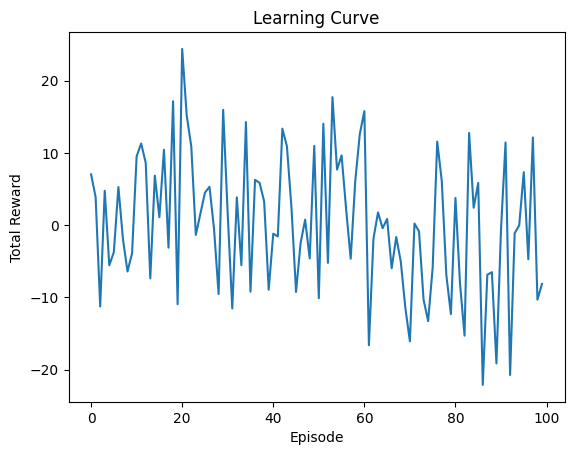

In [39]:
import matplotlib.pyplot as plt

# Example usage for evaluating the trained model
# Assume `model` is the trained RL model

# Test the trained model
total_rewards = []
num_episodes = 100

for _ in range(num_episodes):
    obs = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action)
        episode_reward += reward
    
    total_rewards.append(episode_reward)

# Calculate average reward
avg_reward = np.mean(total_rewards)
print(f"Average Reward over {num_episodes} episodes: {avg_reward}")

# Plotting the learning curve
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Curve')
plt.show()

In [57]:
import gym
from gym import spaces
import torch
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Define your custom Gym environment
class CustomEnv(gym.Env):
    def __init__(self, S, A, Y, R=None):
        self.S = S
        self.A = A
        self.Y = Y
        self.R = R  # Optional reward matrix based on Y
        self.num_samples = S.shape[0]
        self.current_step = 0
        
        # Action space: assume discrete actions for simplicity
        self.action_space = spaces.Discrete(A.shape[1])
        
        # Observation space: separate S and Y
        obs_dim_s = S.shape[1]
        obs_dim_y = Y.shape[1]
        self.observation_space = spaces.Dict({
            'S': spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim_s,), dtype=np.float32),
            'Y': spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim_y,), dtype=np.float32),
        })
        
    def reset(self):
        self.current_step = 0
        return self._get_observation()
    
    def step(self, action):
        # Apply action and get next state and reward
        next_state = self._get_observation()
        reward = self._calculate_reward(action)
        done = (self.current_step == self.num_samples - 1)
        self.current_step += 1
        return next_state, reward, done, {}
    
    def _get_observation(self):
        return {
            'S': self.S[self.current_step],
            'Y': self.Y[self.current_step]
        }
    
    def _calculate_reward(self, action):
        # Example: using a reward matrix R based on expected Y values
        if self.R is not None:
            ideal_y = self.R[action]  # Ideal Y value for the chosen action
            actual_y = self.Y[self.current_step]  # Actual Y value
            reward = -np.linalg.norm(actual_y - ideal_y)  # Negative L2 norm difference as reward
        else:
            # Default reward function (replace with your own logic)
            reward = np.sum(self.A[self.current_step] * action)
        
        return reward

# Example data (replace with your actual data)
S = np.random.randn(1000, 9)
A = np.random.randn(1000, 45)
Y = np.random.randn(1000, 23)

# Example reward matrix R based on Y (replace with your own logic)
R = np.random.randn(45, 23)  # Example: random R matrix for 45 actions and 23 Y features

# Create the custom environment
env = CustomEnv(S, A, Y, R)

# Wrap the environment in a vectorized form
vec_env = DummyVecEnv([lambda: env])

# Initialize and train the RL agent (using PPO as an example)
model = PPO("MultiInputPolicy", vec_env, verbose=1) #  MultiInputPolicy很重要
model.learn(total_timesteps=10000)

# Save and reload the model (optional)
model.save("rl_model")
# model = PPO.load("rl_model")

# Test the trained model
obs = env.reset()
for _ in range(10):  # Test for 10 steps
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}")


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1572 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 1042       |
|    iterations           | 2          |
|    time_elapsed         | 3          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00271051 |
|    clip_fraction        | 0.00806    |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.81      |
|    explained_variance   | -0.000301  |
|    learning_rate        | 0.0003     |
|    loss                 | 6.2e+03    |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0251    |
|    value_loss           | 1.24e+04   |
----------------------------------------
-----------------------------------

In [58]:
obs

{'S': array([ 0.21612199, -0.2774042 ,  0.18650078, -0.03265162, -0.3022883 ,
         0.08037136,  0.03816191, -0.26109779, -0.127289  ]),
 'Y': array([-0.12420115, -0.09958756,  0.88847959,  1.25859574, -0.32624944,
         0.83981638, -0.32178181, -0.38048443, -1.08656403, -0.28067518,
         1.64137828, -0.06652959,  2.29549738, -0.47086446,  0.34647372,
         1.55156816,  0.77892352, -1.18782682, -0.07429324,  0.26817989,
         0.62560905, -0.73113462,  0.86687187])}

In [97]:
import gym
from gym import spaces
import torch
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

class CustomEnv(gym.Env):
    def __init__(self, S, A, Y, R=None):
        self.S = S
        self.A = A
        self.Y = Y
        self.R = R  # Optional reward matrix based on Y
        self.num_samples = S.shape[0]
        self.current_step = 0
        
        # Action space: assume discrete actions for simplicity
        action_dim = A.shape[1]
        self.action_space = spaces.MultiDiscrete([100]*action_dim)
        
        # Observation space: separate S and Y with specific labels
        obs_dim_s = S.shape[1]
        obs_dim_y = Y.shape[1]
        observation_space = {}
        for i in range(obs_dim_s):
            observation_space[f'S_{i+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        for j in range(obs_dim_y):
            observation_space[f'Y_{j+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Dict(observation_space)
        
    def reset(self):
        self.current_step = 0
        return self._get_observation()
    
    def step(self, action):
        # Apply action and get next state and reward
        next_state = self._get_observation()
        reward = self._calculate_reward(action)
        done = (self.current_step == self.num_samples - 1)
        self.current_step += 1
        return next_state, reward, done, {}
    
    def _get_observation(self):
        obs = {}
        for i in range(self.S.shape[1]):
            obs[f'S_{i+1}'] = np.array([self.S[self.current_step, i]])
        for j in range(self.Y.shape[1]):
            obs[f'Y_{j+1}'] = np.array([self.Y[self.current_step, j]])
        return obs
    
    def _calculate_reward(self, action):
        # Example: using a reward matrix R based on expected Y values
        if self.R is not None:
            #print(action)
            #print(self.R)
            ideal_y = self.R[action]  # Ideal Y value for the chosen action
            actual_y = self.Y[self.current_step]  # Actual Y value
            reward = -np.linalg.norm(actual_y - ideal_y)  # Negative L2 norm difference as reward
        else:
            # Default reward function (replace with your own logic)
            reward = np.sum(self.A[self.current_step] * action)
        
        return reward

# Example usage
if __name__ == "__main__":
    # Example data (replace with your actual data)
    S = np.random.randn(1000, 9)
    A = np.random.randint(low=1, high=100,size=(1000, 45))
    Y = np.random.randn(1000, 23)
    
    # Example reward matrix R based on Y (replace with your own logic)
    R = np.random.randn(100, 23)  # Example: random R matrix for 45 actions and 23 Y features
    
    # Create the custom environment
    env = CustomEnv(S, A, Y, R)
    
    # Wrap the environment in a vectorized form
    vec_env = DummyVecEnv([lambda: env])
    
    # Initialize and train the RL agent (using PPO as an example)
    model = PPO("MultiInputPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=10000)
    
    # Save and reload the model (optional)
    #model.save("rl_model")
    # model = PPO.load("rl_model")
    
    # Test the trained model



Using cpu device
-----------------------------
| time/              |      |
|    fps             | 79   |
|    iterations      | 1    |
|    time_elapsed    | 25   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 64          |
|    iterations           | 2           |
|    time_elapsed         | 63          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.037599713 |
|    clip_fraction        | 0.347       |
|    clip_range           | 0.2         |
|    entropy_loss         | -207        |
|    explained_variance   | 0.000357    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.75e+05    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.068      |
|    value_loss           | 5.63e+05    |
-----------------------------------------
-----------------

In [6]:
import gym
from gym import spaces
import torch
import numpy as np

from stable_baselines3.common.vec_env import DummyVecEnv


discrete_action_max = 1000


class CustomEnv(gym.Env):
    def __init__(self, S, A, Y, R, discrete_action_max):
        self.S = torch.tensor(S, dtype=torch.float32)  # Convert S to torch tensor
        self.A = torch.tensor(A, dtype=torch.float32)  # Convert A to torch tensor
        self.Y = torch.tensor(Y, dtype=torch.float32)  # Convert Y to torch tensor
        self.R = torch.tensor(R, dtype=torch.float32) if R is not None else None  # Convert R to torch tensor if provided
        self.num_samples = S.shape[0]
        self.current_step = 0
        self.discrete_action_max = discrete_action_max
        
        # Action space: assume discrete actions for simplicity
        action_dim = A.shape[1]
        self.action_space = spaces.MultiDiscrete([self.discrete_action_max]*action_dim)
        
        # Observation space: separate S and Y with specific labels
        obs_dim_s = S.shape[1]
        obs_dim_y = Y.shape[1]
        observation_space = {}
        for i in range(obs_dim_s):
            observation_space[f'S_{i+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        for j in range(obs_dim_y):
            observation_space[f'Y_{j+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Dict(observation_space)
        
    def reset(self):
        self.current_step = 0
        return self._get_observation()
    
    def step(self, action):
        # Apply action and get next state and reward
        next_state = self._get_observation()
        reward = self._calculate_reward(action)
        done = (self.current_step == self.num_samples - 1)
        self.current_step += 1
        return next_state, reward, done, {}
    
    def _get_observation(self):
        obs = {}
        for i in range(self.S.shape[1]):
            obs[f'S_{i+1}'] = np.array([self.S[self.current_step, i]])
        for j in range(self.Y.shape[1]):
            obs[f'Y_{j+1}'] = np.array([self.Y[self.current_step, j]])
        return obs
    
    def _calculate_reward(self, action):
        # Example: using a reward matrix R based on expected Y values
        if self.R is not None:
            ideal_y = self.R[action]  # Ideal Y value for the chosen action
            actual_y = self.Y[self.current_step]  # Actual Y value
            reward = -torch.norm(actual_y - ideal_y)  # Negative L2 norm difference as reward
        else:
            # Default reward function (replace with your own logic)
            reward = torch.sum(self.A[self.current_step] * action)
        
        return reward




In [10]:
# Example usage

# Example data (replace with your actual data)
S = np.random.randn(1000, 9)
A = np.random.randint(low=10, high=discrete_action_max, size=(1000, 45))
Y = np.random.randn(1000, 23)

# Example reward matrix R based on Y (replace with your own logic)
R = np.random.uniform(low=-100,high=100,size=(discrete_action_max, 23))  # Example: random R matrix for 45 actions and 23 Y features

# Create the custom environment
env = CustomEnv(S, A, Y, R,discrete_action_max=discrete_action_max)

# Wrap the environment in a vectorized form
vec_env = DummyVecEnv([lambda: env])


from stable_baselines3 import PPO,A2C


for RL_model in [PPO,A2C]:
    print(RL_model)
    # Initialize and train the RL agent (using PPO as an example)
    model = RL_model("MultiInputPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=10000)
    new_obs = dict()
    for i in range(S.shape[1]):
        new_obs[f'S_{i+1}'] = np.array([np.random.randn(1)])
    for j in range(Y.shape[1]):
        new_obs[f'Y_{j+1}'] = np.array([np.random.randn(1)])
    r = None
    best_action = None
    for i in range(100):  # Test for 10 steps
        action, _ = model.predict(new_obs)
        obs, reward, done, info = env.step(action)
        if r == None:
            r = reward
        elif r < reward:
            r = reward
            best_action = action

            print(f"Action: {best_action}, Reward: {r}, {i}")
# Save and reload the model (optional)
#model.save("rl_model")
# model = PPO.load("rl_model")

# Test the trained model


# # 官網標準寫法
# env = gym.make("CartPole-v1", render_mode="human")

# model = PPO("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=10_000)

# vec_env = model.get_env()
# obs = vec_env.reset()
# for i in range(1000):
#     action, _states = model.predict(obs, deterministic=True)
#     obs, reward, done, info = vec_env.step(action)
#     vec_env.render()
#     # VecEnv resets automatically
#     # if done:
#     #   obs = env.reset()

# env.close()
# #


# # 這邊是觀察內部
# for i_episode in range(5): #how many episodes you want to run
#     observation = env.reset() #reset() returns initial observation
#     for t in range(200):
#         env.render()
#         print(observation)
#         action = env.action_space.sample()
#         observation, reward, done, info = env.step(action)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break

# # 這邊則是進行預測
# for _ in range(10):  # Test for 10 steps
#     action, _ = model.predict(obs, deterministic=True)
#     obs, reward, done, info = env.step(action)
#     print(f"Action: {action}, Reward: {reward}")

<class 'stable_baselines3.ppo.ppo.PPO'>
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 54   |
|    iterations      | 1    |
|    time_elapsed    | 37   |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 2             |
|    time_elapsed         | 110           |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00059329194 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -311          |
|    explained_variance   | -5.72e-06     |
|    learning_rate        | 0.0003        |
|    loss                 | 4.69e+08      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.0187       |
|    value_loss           | 9

In [12]:
for RL_model in [PPO,A2C]:
    print(RL_model)
    # Initialize and train the RL agent (using PPO as an example)
    model = RL_model("MultiInputPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=10000)
    new_obs = dict()
    for i in range(S.shape[1]):
        new_obs[f'S_{i+1}'] = np.array([np.random.randn(1)])
    for j in range(Y.shape[1]):
        new_obs[f'Y_{j+1}'] = np.array([np.random.randn(1)])
    r = None
    best_action = None
    for kkkkkk in range(1000):  # Test for 1000 steps
        action, _ = model.predict(new_obs)
        obs, reward, done, info = env.step(action)
        if r == None:
            r = reward
        elif r < reward:
            r = reward
            best_action = action

            print(f"Action: {best_action}, Reward: {r}, {kkkkkk}")

<class 'stable_baselines3.ppo.ppo.PPO'>
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 53   |
|    iterations      | 1    |
|    time_elapsed    | 38   |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 2             |
|    time_elapsed         | 110           |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00063626096 |
|    clip_fraction        | 0.00483       |
|    clip_range           | 0.2           |
|    entropy_loss         | -311          |
|    explained_variance   | 1.04e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 4.77e+08      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.0191       |
|    value_loss           | 9

IndexError: index 1000 is out of bounds for dimension 0 with size 1000

In [45]:
obs = env.reset()

In [46]:
model

Action: [[ 346 3301 4950  231 9982 1267 5578 5405 1448 1306 2188 2240 1389 8888
  6087 4519 4598 6955 5826 6926 1892 4558 9558 6319 6369  645 5675 3830
  1653 8167 8493 9182 9381 3805 2296 2930 8986 5164 8139 3192 4044 2616
  7993 3491 4640]], Reward: -1868.0452880859375, 1
Action: [[5731 1093  339 6056 2416 1782 1185 3732 4084 2192 2422 8413 6818  426
   712 4277 7799 2483 9223 8081 2218  873 9848 5805 9006 6084 1019 3598
  2319 9289  281 1525 1718 8860 2941 4219 4577  433 4621 3706  423 1926
  2014 7846 9479]], Reward: -1834.482177734375, 2
Action: [[8201 8043 2316 7600 1062 5547 8239 4554 6959 3334 4054 9622 5016 8152
  3100 9848 7208 1884 8049 7013 8937 5607 1401 3083 9326  572 2671 4930
  3719 4051 4072 4431 2420 7958 7405 2688 2433 9568 3683 8967 1163 8205
  5306 4664 8452]], Reward: -1815.260986328125, 3
Action: [[8496 7805  664 4239 4329 4717 7510 6100 7084 2302 4518 1603 5710 4234
   492 3521 5464 6494 8944 2600 9533 8562 8949 3140 5086 6788 9110 7318
  4995 3643 3876 8940 128

99

In [72]:
import gym
from gym import spaces
import numpy as np
import pybullet as p
import pybullet_data
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

class CustomBulletEnv(gym.Env):
    def __init__(self, S, A, Y, R=None):
        super(CustomBulletEnv, self).__init__()
        self.S = S
        self.A = A
        self.Y = Y
        self.R = R  # Optional reward matrix based on Y
        self.num_samples = S.shape[0]
        self.current_step = 0

        # Action space: A_1 to A_45
        action_dim = A.shape[1]
        self.action_space = spaces.Dict({
            f'A_{i+1}': spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32) for i in range(action_dim)
        })

        # Observation space: S_1 to S_9 and Y_1 to Y_23
        obs_dim_s = S.shape[1]
        obs_dim_y = Y.shape[1]
        observation_space = {}
        for i in range(obs_dim_s):
            observation_space[f'S_{i+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        for j in range(obs_dim_y):
            observation_space[f'Y_{j+1}'] = spaces.Box(low=-np.inf, high=np.inf, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Dict(observation_space)

        # Initialize PyBullet
        self.physicsClient = p.connect(p.DIRECT)  # Use p.GUI for graphical version
        p.setAdditionalSearchPath(pybullet_data.getDataPath())

    def reset(self):
        self.current_step = 0
        return self._get_observation()

    def step(self, action):
        # Apply action and get next state and reward
        next_state = self._get_observation()
        reward = self._calculate_reward(action)
        done = (self.current_step == self.num_samples - 1)
        self.current_step += 1
        return next_state, reward, done, {}

    def _get_observation(self):
        obs = {}
        for i in range(self.S.shape[1]):
            obs[f'S_{i+1}'] = np.array([self.S[self.current_step, i]])
        for j in range(self.Y.shape[1]):
            obs[f'Y_{j+1}'] = np.array([self.Y[self.current_step, j]])
        return obs

    def _calculate_reward(self, action):
        # Example: using a reward matrix R based on expected Y values
        if self.R is not None:
            ideal_y = self.R[action]  # Ideal Y value for the chosen action
            actual_y = self.Y[self.current_step]  # Actual Y value
            reward = -np.linalg.norm(actual_y - ideal_y)  # Negative L2 norm difference as reward
        else:
            # Default reward function (replace with your own logic)
            reward = np.sum(self.A[self.current_step] * action)
        return reward

    def close(self):
        p.disconnect(self.physicsClient)

# Example usage
if __name__ == "__main__":
    # Example data (replace with your actual data)
    S = np.random.randn(1000, 9)
    A = np.random.randn(1000, 45)
    Y = np.random.randn(1000, 23)
    
    # Example reward matrix R based on Y (replace with your own logic)
    R = np.random.randn(45, 23)  # Example: random R matrix for 45 actions and 23 Y features
    
    # Create the custom environment
    env = CustomBulletEnv(S, A, Y, R)
    
    # Wrap the environment in a vectorized form
    vec_env = DummyVecEnv([lambda: env])
    
    # Initialize and train the RL agent (using PPO as an example)
    model = PPO("MlpPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=10000)
    
    # Save and reload the model (optional)
    #model.save("rl_model")
    # model = PPO.load("rl_model")
    
    # Test the trained model
    obs = env.reset()
    for _ in range(10):  # Test for 10 steps
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        print(f"Action: {action}, Reward: {reward}")


Using cpu device


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


AssertionError: The algorithm only supports (<class 'gymnasium.spaces.box.Box'>, <class 'gymnasium.spaces.discrete.Discrete'>, <class 'gymnasium.spaces.multi_discrete.MultiDiscrete'>, <class 'gymnasium.spaces.multi_binary.MultiBinary'>) as action spaces but Dict('A_1': Box(-1.0, 1.0, (1,), float32), 'A_10': Box(-1.0, 1.0, (1,), float32), 'A_11': Box(-1.0, 1.0, (1,), float32), 'A_12': Box(-1.0, 1.0, (1,), float32), 'A_13': Box(-1.0, 1.0, (1,), float32), 'A_14': Box(-1.0, 1.0, (1,), float32), 'A_15': Box(-1.0, 1.0, (1,), float32), 'A_16': Box(-1.0, 1.0, (1,), float32), 'A_17': Box(-1.0, 1.0, (1,), float32), 'A_18': Box(-1.0, 1.0, (1,), float32), 'A_19': Box(-1.0, 1.0, (1,), float32), 'A_2': Box(-1.0, 1.0, (1,), float32), 'A_20': Box(-1.0, 1.0, (1,), float32), 'A_21': Box(-1.0, 1.0, (1,), float32), 'A_22': Box(-1.0, 1.0, (1,), float32), 'A_23': Box(-1.0, 1.0, (1,), float32), 'A_24': Box(-1.0, 1.0, (1,), float32), 'A_25': Box(-1.0, 1.0, (1,), float32), 'A_26': Box(-1.0, 1.0, (1,), float32), 'A_27': Box(-1.0, 1.0, (1,), float32), 'A_28': Box(-1.0, 1.0, (1,), float32), 'A_29': Box(-1.0, 1.0, (1,), float32), 'A_3': Box(-1.0, 1.0, (1,), float32), 'A_30': Box(-1.0, 1.0, (1,), float32), 'A_31': Box(-1.0, 1.0, (1,), float32), 'A_32': Box(-1.0, 1.0, (1,), float32), 'A_33': Box(-1.0, 1.0, (1,), float32), 'A_34': Box(-1.0, 1.0, (1,), float32), 'A_35': Box(-1.0, 1.0, (1,), float32), 'A_36': Box(-1.0, 1.0, (1,), float32), 'A_37': Box(-1.0, 1.0, (1,), float32), 'A_38': Box(-1.0, 1.0, (1,), float32), 'A_39': Box(-1.0, 1.0, (1,), float32), 'A_4': Box(-1.0, 1.0, (1,), float32), 'A_40': Box(-1.0, 1.0, (1,), float32), 'A_41': Box(-1.0, 1.0, (1,), float32), 'A_42': Box(-1.0, 1.0, (1,), float32), 'A_43': Box(-1.0, 1.0, (1,), float32), 'A_44': Box(-1.0, 1.0, (1,), float32), 'A_45': Box(-1.0, 1.0, (1,), float32), 'A_5': Box(-1.0, 1.0, (1,), float32), 'A_6': Box(-1.0, 1.0, (1,), float32), 'A_7': Box(-1.0, 1.0, (1,), float32), 'A_8': Box(-1.0, 1.0, (1,), float32), 'A_9': Box(-1.0, 1.0, (1,), float32)) was provided

In [76]:
import gym
import numpy as np
from ray import tune
from ray.rllib.agents import ppo
from ray.rllib.env.multi_agent_env import MultiAgentEnv

class CustomMultiAgentEnv(MultiAgentEnv):
    def __init__(self, config):
        super().__init__()
        self.S = config['S']  # Fixed matrix S
        self.A = config['A']  # Matrix A, actions that affect Y
        self.Y = config['Y']  # Desired outcomes

        self.num_agents = self.A.shape[1]  # Number of agents/actions

        self.current_step = 0
        self.max_steps = self.Y.shape[0]  # Assuming Y has 1000 samples

        # Define action space and observation space for each agent
        self.action_space = gym.spaces.Discrete(self.num_agents)
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=self.S.shape, dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.S[self.current_step]

    def step(self, action_dict):
        # action_dict maps agent_id to action index
        actions = np.array([action_dict[f'agent_{i}'] for i in range(self.num_agents)])
        
        # Simulate the effect of actions A on Y
        current_Y = self.Y[self.current_step]
        predicted_Y = np.dot(self.A[self.current_step], actions)

        # Reward function (example: negative mean squared error)
        rewards = -np.mean((current_Y - predicted_Y) ** 2)

        self.current_step += 1
        done = self.current_step >= self.max_steps

        # Return observations, rewards, done flag, and info
        obs = self.S[self.current_step] if not done else None
        info = {}  # Additional info, if needed
        return obs, rewards, done, info

# Example usage
if __name__ == "__main__":
    config = {
        'S': np.random.rand(1000, 9),  # Replace with your actual S matrix
        'A': np.random.rand(1000, 45),  # Replace with your actual A matrix
        'Y': np.random.rand(1000, 23),  # Replace with your actual Y matrix
    }

    tune.register_env("custom_multi_agent_env", lambda config: CustomMultiAgentEnv(config))
    trainer = ppo.PPOTrainer(env="custom_multi_agent_env")

    # Training loop (you can adjust num_iterations as needed)
    num_iterations = 1000
    for i in range(num_iterations):
        result = trainer.train()
        print(f"Iteration {i}: {result}")

    # Example of using the trained policy to predict actions for new S and Y
    trained_policy = trainer.get_policy()
    new_S = np.random.rand(9)  # Replace with your new S vector
    new_Y = np.random.rand(23)  # Replace with your new Y vector
    action_dict = trained_policy.compute_actions([new_S])
    print(f"Predicted actions for new S and Y: {action_dict}")


2024-07-10 13:54:57,951	WARNING compression.py:16 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.


ModuleNotFoundError: No module named 'ray.rllib.agents'